In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.metrics import Recall, MeanSquaredError, AUC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv('bank.csv')

In [212]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [214]:
df.drop_duplicates()
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

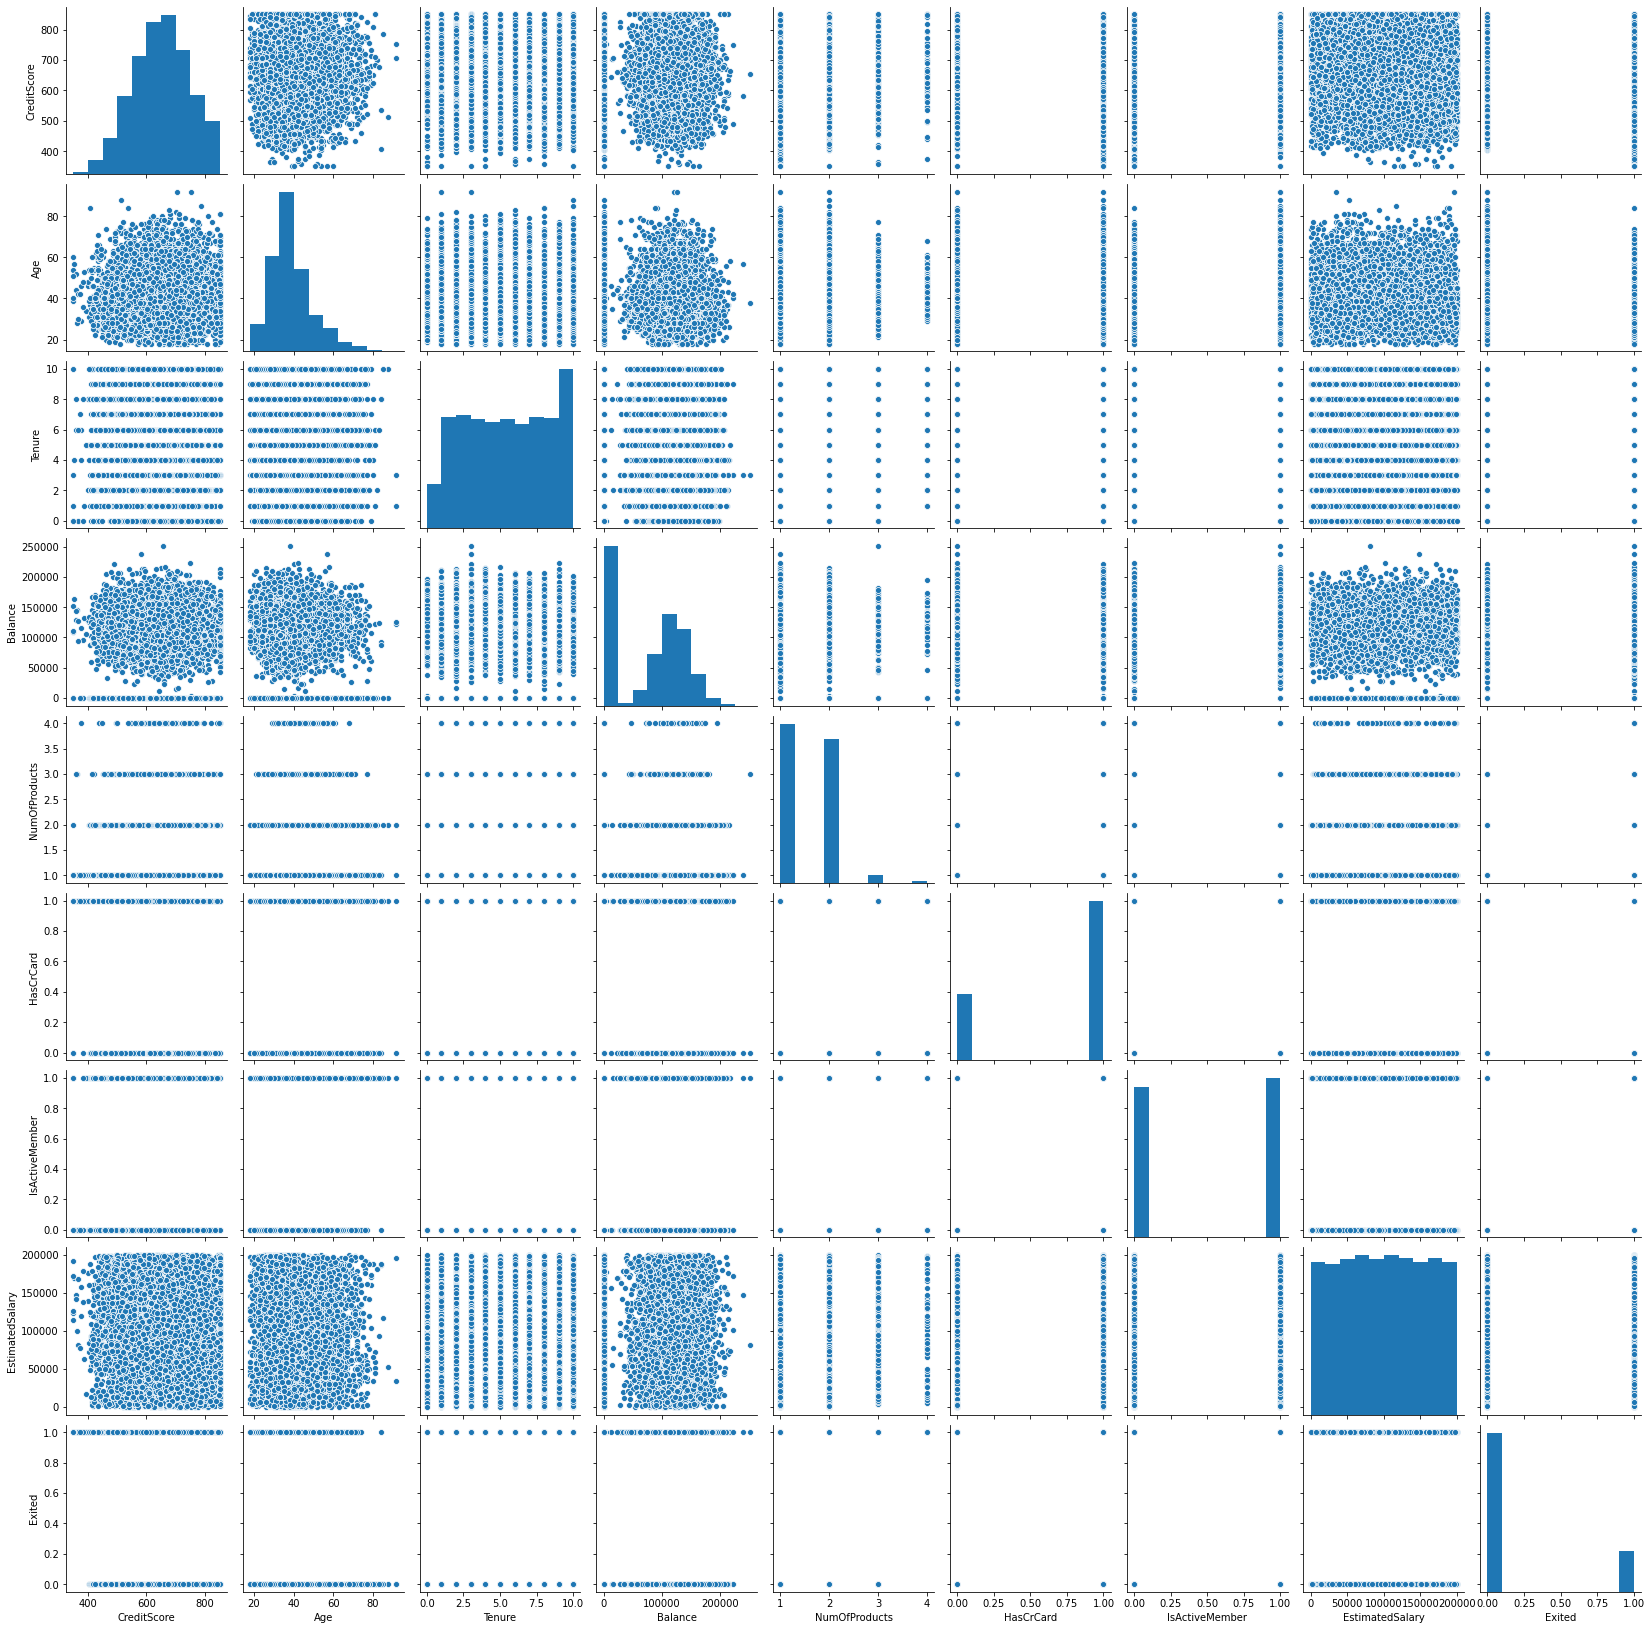

In [215]:
sns.pairplot(df);

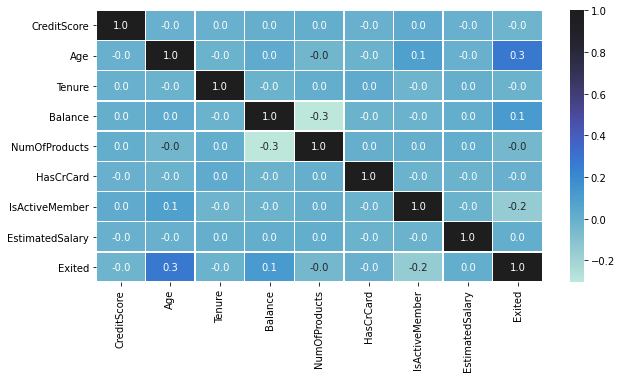

In [216]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [218]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [219]:
df = pd.get_dummies(df)

In [220]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [221]:
df = df.astype('float32')
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640625,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.609375,1.0,1.0,1.0,101699.773438,0.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.000000,1.0,0.0,1.0,42085.578125,1.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,3.0,75075.312500,2.0,1.0,0.0,92888.523438,1.0,0.0,1.0,0.0,0.0,1.0


In [222]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]

Y = df['Exited']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [224]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 14)
(2000, 14)
(8000,)
(2000,)


In [225]:
# MODEL 1
model = Sequential()

In [226]:
model.add(Dense(20, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid'))

In [227]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=["accuracy", Recall(class_id=0,name="recall_0")])
model.fit(X_train, y_train.values, batch_size = 500, epochs = 10, validation_split = 0.2, verbose = 1)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 126us/sample - loss: 0.6827 - acc: 0.6897 - recall_0: 0.1002 - val_loss: 0.6697 - val_acc: 0.7975 - val_recall_0: 0.0000e+00
Epoch 2/10
6400/6400 [==============================] - 0s 6us/sample - loss: 0.6599 - acc: 0.7972 - recall_0: 0.0000e+00 - val_loss: 0.6486 - val_acc: 0.7975 - val_recall_0: 0.0000e+00
Epoch 3/10
6400/6400 [==============================] - 0s 7us/sample - loss: 0.6390 - acc: 0.7972 - recall_0: 0.0000e+00 - val_loss: 0.6273 - val_acc: 0.7975 - val_recall_0: 0.0000e+00
Epoch 4/10
6400/6400 [==============================] - 0s 7us/sample - loss: 0.6178 - acc: 0.7972 - recall_0: 0.0000e+00 - val_loss: 0.6069 - val_acc: 0.7975 - val_recall_0: 0.0000e+00
Epoch 5/10
6400/6400 [==============================] - 0s 6us/sample - loss: 0.5980 - acc: 0.7972 - recall_0: 0.0000e+00 - val_loss: 0.5871 - val_acc: 0.7975 - val_recall_0: 0.0000e+00
Epoch 6/10
6400/6400 [==

In [228]:
results = model.evaluate(X_test, y_test.values)
print(model.metrics_names)
print(results) 

2000/2000 [==============================] - 0s 50us/sample - loss: 0.5262 - acc: 0.7925 - recall_0: 0.0000e+00
['loss', 'acc', 'recall_0']
[0.5261579341888428, 0.7925, 0.0]


In [229]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/2000 [==============================] - 0s 27us/sample - loss: 0.5262 - acc: 0.7925 - recall_0: 0.0000e+00
Accuracy Model (Dropout): 0.7925
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[1585,    0],
       [ 415,    0]])

In [230]:
# MODEL 2

In [231]:
model2 = Sequential()

In [232]:
model2.add(Dense(500, input_shape = (14,), activation = 'relu'))
model2.add(Dense(100, activation = 'tanh'))
model2.add(Dense(50, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))

In [233]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=["accuracy",Recall(class_id=0,name="recall_0"), MeanSquaredError()])

In [234]:
model2.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 500)               7500      
_________________________________________________________________
dense_86 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_87 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 51        
Total params: 62,701
Trainable params: 62,701
Non-trainable params: 0
_________________________________________________________________


In [235]:
# epochs - loss decreases and accuracy gets better
# change metrics on the compile  model
model2.fit(X_train, y_train.values, batch_size = 500, epochs = 10, verbose = 1)

Epoch 1/10
8000/8000 [==============================] - 0s 51us/sample - loss: 0.5325 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1736
Epoch 2/10
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4994 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1602
Epoch 3/10
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4978 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1597
Epoch 4/10
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4971 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1595
Epoch 5/10
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4976 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1596
Epoch 6/10
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4969 - acc: 0.7972 - recall_0: 0.0000e+00 - mean_squared_error: 0.1594
Epoch 7/10
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4964 - acc:

In [236]:
results = model2.evaluate(X_test, y_test.values)
print(model2.metrics_names)
print(results) 

2000/2000 [==============================] - 0s 162us/sample - loss: 0.5035 - acc: 0.7925 - recall_0: 0.0000e+00 - mean_squared_error: 0.1622
['loss', 'acc', 'recall_0', 'mean_squared_error']
[0.5034769463539124, 0.7925, 0.0, 0.16220462]


In [237]:
Y_pred_cls = model2.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model (Dropout): '+ str(model2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/2000 [==============================] - 0s 48us/sample - loss: 0.5035 - acc: 0.7925 - recall_0: 0.0000e+00 - mean_squared_error: 0.1622
Accuracy Model (Dropout): 0.7925
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[1585,    0],
       [ 415,    0]])